In [89]:
import numpy as np
import pandas as pd
import itertools
import networkx as nx 
import matplotlib.pyplot as plt 

Read csv into pandas dataframe

In [90]:
data = pd.read_csv('yncmods.csv')
data.head(10)

,Module Code,Level,Instructor,Major
0,YSC1212-1,1000,DANVY,MCS
1,YSC1216,1000,WERTZ,MCS
2,YSC2209,2000,FRANCESCA,MCS
3,YSC2213,2000,STAMPS,MCS
4,YSC2221,2000,RAZVAN,MCS
5,YSC2229,2000,SERGEY,MCS
6,YSC2232,2000,WERTZ,MCS
7,YSC2239-1,2000,VAN DEN BOOM,MCS
8,YSC2244,2000,BODIN,MCS
9,YSC3217,3000,BODIN,MCS


## Conditions for being neighbours 

#### Within each major: 

1000 clashes with 1000 and 2000; 

2000 clashes with 1000 and 2000; 

3000 clashes with 3000 and 4000; 

4000 clashes with 3000 and 4000;

Prof cannot be the same. 

In [145]:
dic = {}

#Each codule 
for i in range(0, len(df.index)):
    
    if (data["Level"][i] == 1000): 
        dic[data["Module Code"][i]] = \
        data[(((data["Level"] == 1000) \
               & (data["Major"][i] == data["Major"])) \
              | ((data["Level"] == 2000) \
                 & (data["Major"][i] == data["Major"])) \
              | (data["Instructor"] == data["Instructor"][i])) \
             & (data["Module Code"] != data["Module Code"][i])]["Module Code"].tolist()
        
    elif (data["Level"][i] == 2000) :
        dic[data["Module Code"][i]] = \
        data[(((data["Level"] == 1000) \
               & (data["Major"][i] == data["Major"])) \
              | ((data["Level"] == 2000) \
                 & (data["Major"][i] == data["Major"])) \
              | (data["Instructor"] == data["Instructor"][i])) \
             & (data["Module Code"] != data["Module Code"][i])]["Module Code"].tolist()
        
    elif (data["Level"][i] == 3000) or (data["Level"][i] == 4000): 
        dic[data["Module Code"][i]] = \
        data[(((data["Level"] == 3000) & (data["Major"][i] == data["Major"])) \
              | ((data["Level"] == 4000) & (data["Major"][i] == data["Major"])) \
             | (data["Instructor"] == data["Instructor"][i]))
             & (data["Module Code"] != data["Module Code"][i])]["Module Code"].tolist()

In [146]:
def first_available(color_list):
    """Return smallest non-negative integer not in the given list of colors."""
    color_set = set(color_list)
    count = 0
    while True:
        if count not in color_set :
            return count
        count += 1
        
def greedy_color(G, order):
    """Find the greedy coloring of G in the given order.
    The representation of G is assumed to be like https://www.python.org/doc/essays/graphs/
    in allowing neighbors of a node/vertex to be iterated over by "for w in G[node]".
    The return value is a dictionary mapping vertices to their colors."""
    color = dict()
    color_count = {}
    for node in order:
        used_neighbour_colors = [color[nbr] for nbr in G[node]
                                 if nbr in color]
        color[node] = first_available(used_neighbour_colors)
        
        used_color = color[node]
        
        if used_color in color_count:
            color_count[used_color] = color_count.get(used_color) + 1
        else :
            color_count.setdefault(color[node],0)
        
        if (color_count.get(used_color) > 28) : 
            used_neighbour_colors.append(used_color)
            color[node] = first_available(used_neighbour_colors)
            
    return color


def order(dic): 
    for i in list(dic.keys()):
        print(len(dic[i]))

diclist = list(dic.keys())
diclist.reverse()

coloring = greedy_color(dic, diclist)

# use colors as key instead 
colors_to_mod = {} 
for key in coloring:
    colors_to_mod.setdefault(coloring[key],[]).append(key)

for i in range(0, len(colors_to_mod)):
    print(len(colors_to_mod[i]))

29
29
25
17
14
8
7
4
2
1


## Graph representation

In [149]:
edges1 = []

for i in dic.keys():
    for j in dic[i]:
        edges1.append((i,j))

        
edges = []

for i in edges1: 
    if (i[1], i[0]) not in edges:
        edges.append(i)

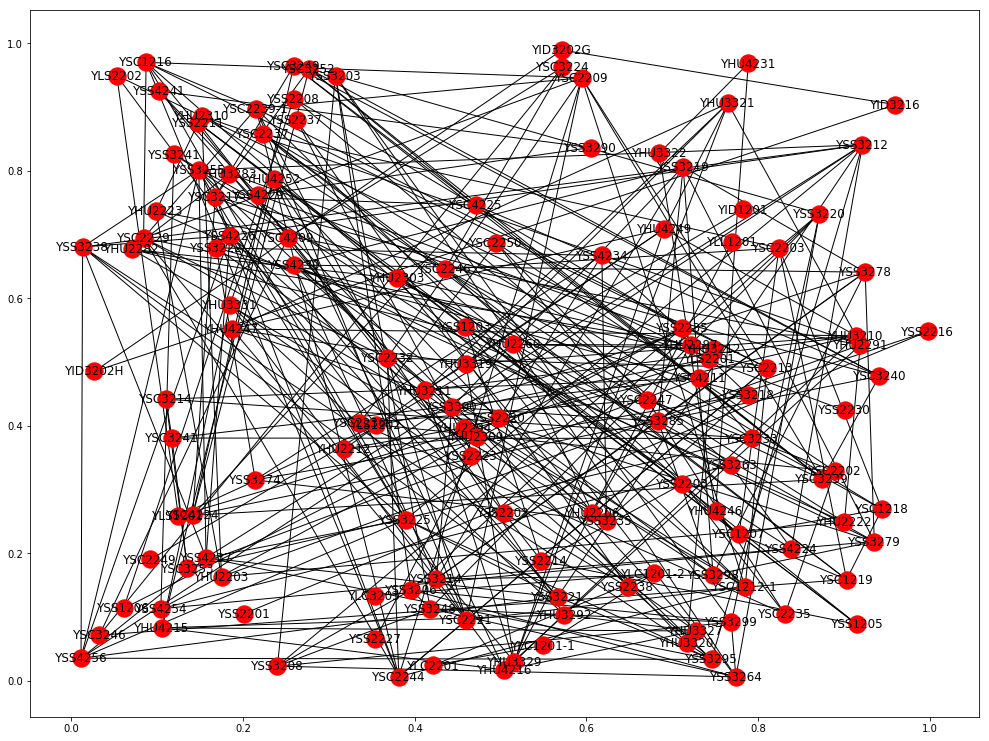

In [153]:
G = nx.Graph() 
G.add_edges_from(edges) 
pos = nx.random_layout(G)
plt.figure(figsize =(17, 13)) 
nx.draw_networkx(G, pos, with_label = False) 

In [154]:
cycles = nx.cycle_basis(G)

maxlen = 0
for i in cycles:
    if len(i) > maxlen: 
        maxlen = len(i)
        
minlen = 10
for i in cycles:
    if len(i) < minlen: 
        minlen = len(i)
        
print("The number of cycles is", len(cycles),"\n", "The longest cycle is", maxlen,"\n", "The shortest cycle is", minlen)



The number of cycles is 198 
 The longest cycle is 4 
 The shortest cycle is 3


In [7]:
def first_available(color_list):
    """Return smallest non-negative integer not in the given list of colors."""
    color_set = set(color_list)
    count = 0
    while True:
        if count not in color_set:
            return count
        count += 1
        
def greedy_color(G, order):
    """Find the greedy coloring of G in the given order.
    The representation of G is assumed to be like https://www.python.org/doc/essays/graphs/
    in allowing neighbors of a node/vertex to be iterated over by "for w in G[node]".
    The return value is a dictionary mapping vertices to their colors."""
    color = dict()
    for node in order:
        used_neighbour_colors = [color[nbr] for nbr in G[node]
                                 if nbr in color]
        color[node] = first_available(used_neighbour_colors)
    return color


def order(dic): 
    for i in list(dic.keys()):
        print(len(dic[i]))

diclist = list(dic.keys())
diclist.reverse()

        
print(greedy_color(dic, diclist))

{'YSC4224': 0, 'YSC3252': 1, 'YSC3249': 2, 'YSC3240': 3, 'YSC3239': 4, 'YSC3217': 5, 'YSC2244': 0, 'YSC2239-1': 1, 'YSC2232': 2, 'YSC2229': 3, 'YSC2221': 4, 'YSC2213': 5, 'YSC2209': 6, 'YSC1216': 7, 'YSC1212-1': 8}


In [8]:
import random
"""
RANDOM:
Iterate the following process I times:
  Randomly permute the vertices;
  Apply GREEDY;
  If the current coloring is the best one found, save it.
Then report the best coloring found.
"""

def random_color(G, I):
    bestCount = 200000000
    bestColoring = {}
    for i in range(1,I):
        random.shuffle(list(G.keys()))
        bestColoring = greedy_color(G,G.keys())
        count = max(list(bestColoring.values()))
        if count < bestCount:
            bestCount = count
            bestColoring = G
    return bestColoring, bestCount

print(random_color(dic, 30))

({'YSC1212-1': 0, 'YSC1216': 1, 'YSC2209': 2, 'YSC2213': 3, 'YSC2221': 4, 'YSC2229': 5, 'YSC2232': 6, 'YSC2239-1': 7, 'YSC2244': 8, 'YSC3217': 0, 'YSC3239': 1, 'YSC3240': 2, 'YSC3249': 3, 'YSC3252': 4, 'YSC4224': 5}, 8)
